## Обучение с учителем в Scikit-learn

In [1]:
import numpy as np
import pandas as pd

### Задание 1
Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы x и y из этих данных.
Разбейте эти датафреймы на тренировочные (x_train, y_train) и тестовые (x_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as linear_regression
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

In [3]:
boston = load_boston()
data = boston['data']

In [4]:
x = pd.DataFrame(data, columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['price'])
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
lr = linear_regression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
y_pred = lr.predict(x_test)

In [7]:
r2_score(y_true["price"], y_pred.flatten())

0.7112260057484943

## Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [8]:
from sklearn.ensemble import RandomForestRegressor

# import warnings
# warnings.filterwarnings('ignore')

In [9]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(x_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [11]:
y_pred = model.predict(x_test)

In [12]:
r2_score(y_true["price"], y_pred.flatten())

0.8749965273218174

### * Задание 3
Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.

In [13]:
import matplotlib as plt

%matplotlib inline

In [14]:
feature_importances = pd.Series(model.feature_importances_, index=boston['feature_names'])
feature_importances.sort_values(ascending=False, inplace=True)

In [15]:
feature_importances[:2]

LSTAT    0.415679
RM       0.402705
dtype: float64

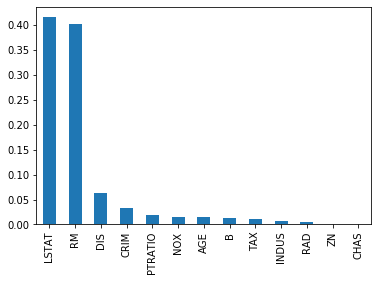

In [16]:
feature_importances.plot(kind='bar')